In [1]:
from pathlib import Path
import cv2 as cv
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import os
import openslide

thispath = Path.cwd().resolve()

In [2]:
def check_corners(img):
    """
    This function checks the corner pixels of an image and returns the BGR values for the background.

    Parameters
    ----------
    img (numpy.ndarray): Image data

    Returns
    -------
    background_pixel (numpy.ndarray): BGR values for the background
    """
    cropped_image = img.copy()
    width, height, _ = cropped_image.shape
    cropped_image = cropped_image[100:width-100, 100:height-1]
    width, height, _ = cropped_image.shape
    top_left = img[0, 0, :]
    top_right = img[width-1, 0, :]
    bottom_left = img[0, height-1, :]
    bottom_right = img[width-1, height-1, :]
    most_frequent = np.argmax(np.bincount([np.sum(top_left), np.sum(top_right), np.sum(bottom_left), np.sum(bottom_right)]))

    if most_frequent == np.sum(top_left):
        return top_left
    
    elif most_frequent == np.sum(top_right):
        return top_right

    elif most_frequent == np.sum(bottom_left):
        return bottom_left
    
    elif most_frequent == np.sum(bottom_right):
        return bottom_right


def available_magnifications(mpp, level_downsamples):
	mpp = float(mpp)
	if (mpp<0.26):
		magnification = 40
	else:
		magnification = 20
	
	mags = []
	for l in level_downsamples:
		mags.append(magnification/l)
	
	return mags

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030438500320103.svs
((149400, 65765), (37350, 16441), (9337, 4110), (2334, 1027))
0.25180000000000002
[40.0, 9.999923971139445, 2.499838029926679, 0.6247739585378796]


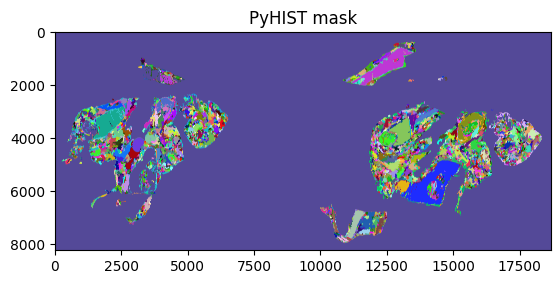

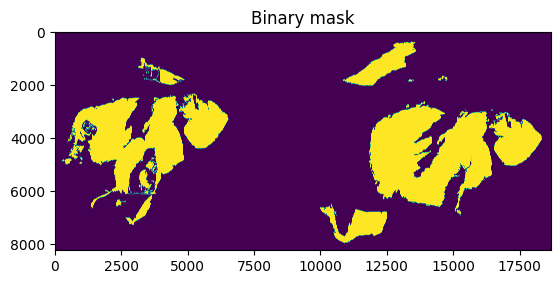

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030303300314209.svs
((57853, 42223), (14463, 10555), (3615, 2638))
0.50049999999999994
[20.0, 4.999779155108691, 1.2496375171338154]


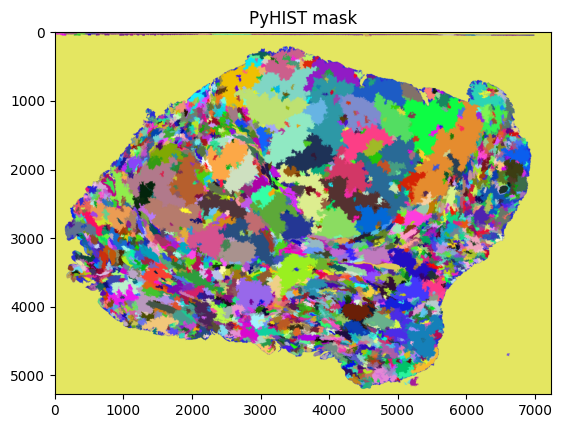

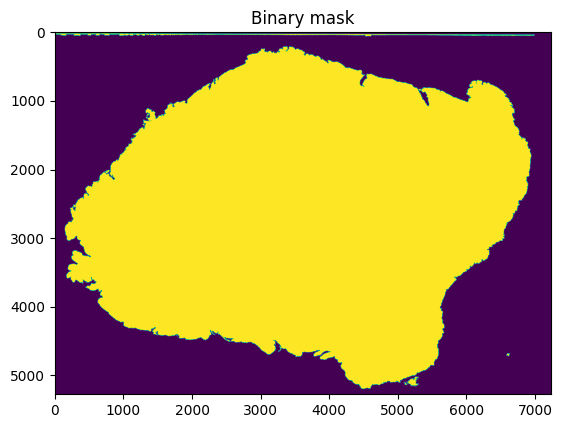

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030732500335034.svs
((75696, 29620), (18924, 7405), (4731, 1851), (2365, 925))
0.50229999999999997
[20.0, 5.0, 1.249915591869809, 0.6247229066017659]


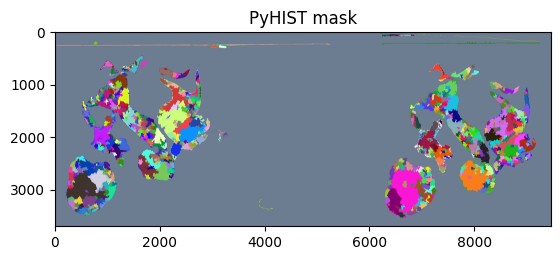

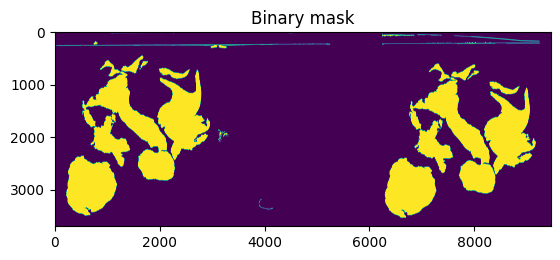

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030490000322447.svs
((103737, 46176), (25934, 11544), (6483, 2886), (3241, 1443))
0.50049999999999994
[20.0, 4.999975900478617, 1.2499457739859736, 0.6249246802828647]


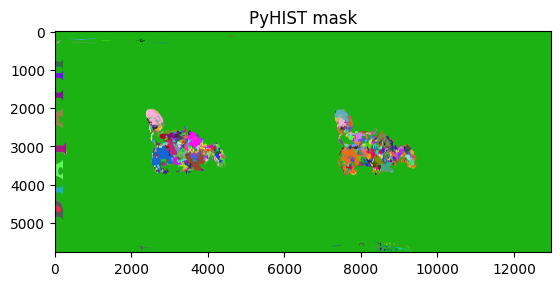

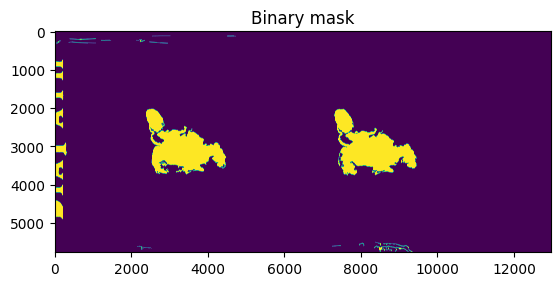

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030508000324808.svs
((45884, 33846), (11471, 8461), (2867, 2115))
0.50049999999999994
[20.0, 4.999852267690944, 1.2497257461520914]


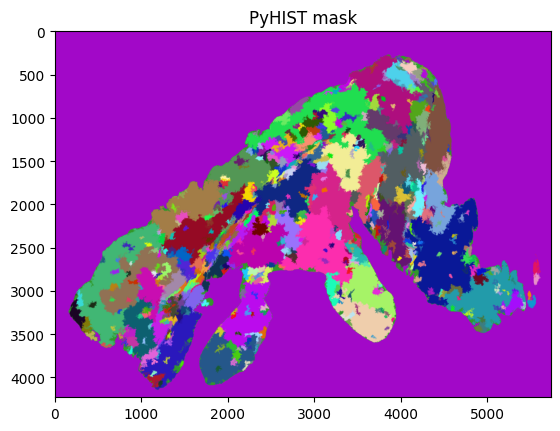

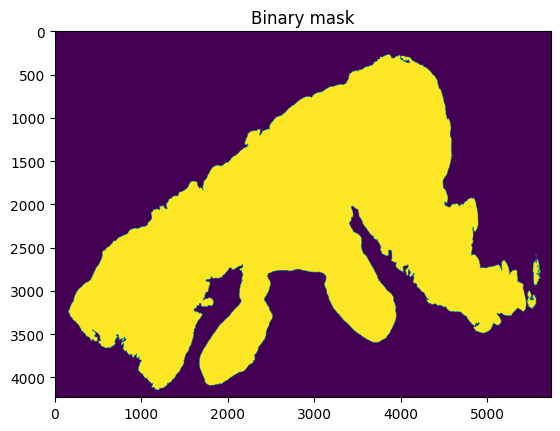

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030640600331515.svs
((53863, 44556), (13465, 11139), (3366, 2784))
0.50049999999999994
[20.0, 4.999860753970832, 1.249750441842967]


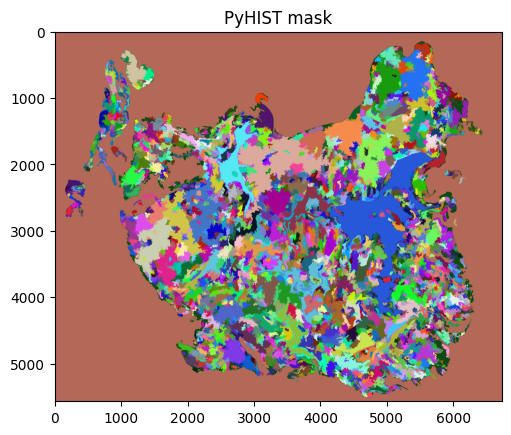

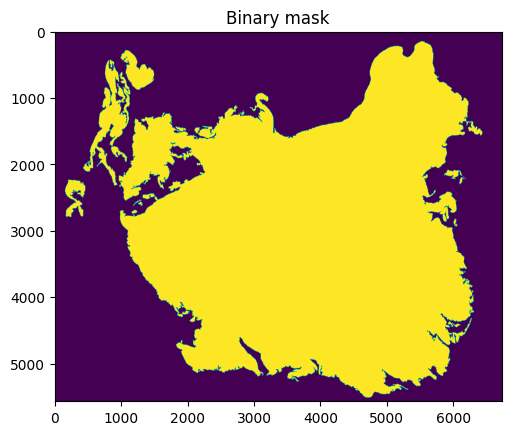

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030963300346648.svs
((119520, 37205), (29880, 9301), (7470, 2325), (3735, 1162))
0.25209999999999999
[40.0, 9.999865607654987, 2.4998320005375985, 1.2496471252470123]


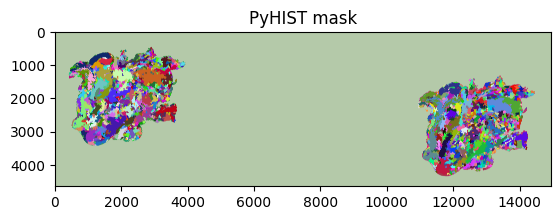

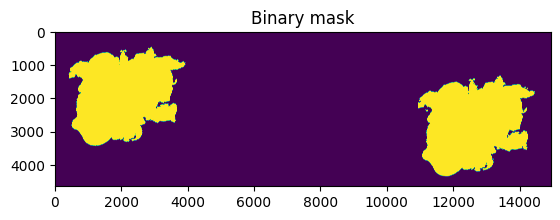

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030689500332895.svs
((135456, 49686), (33864, 12421), (8466, 3105), (2116, 776))
0.25180000000000002
[40.0, 9.999798732011673, 2.4998490429321896, 0.6247877996645432]


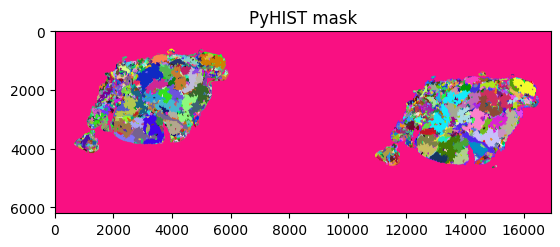

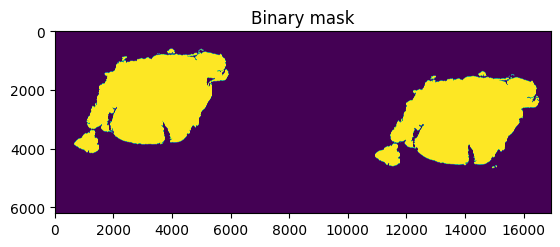

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030689200333240.svs
((57768, 40344), (14442, 10086), (3610, 2521))
0.50229999999999997
[20.0, 5.0, 1.2497895116067783]


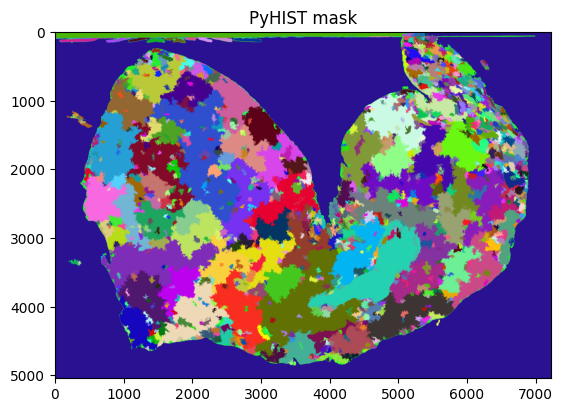

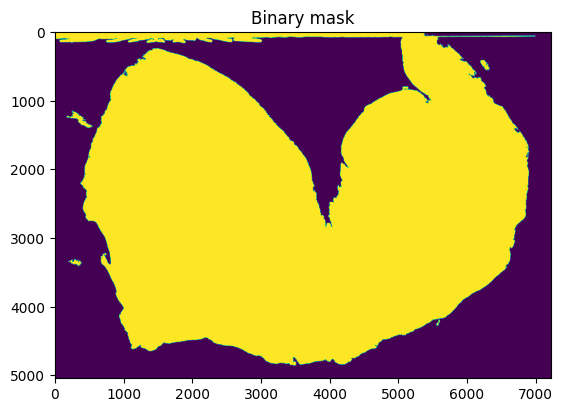

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030734200335038.svs
((93624, 42582), (23406, 10645), (5851, 2661), (2925, 1330))
0.50229999999999997
[20.0, 4.999882576736103, 1.249858528549285, 0.6247584285476662]


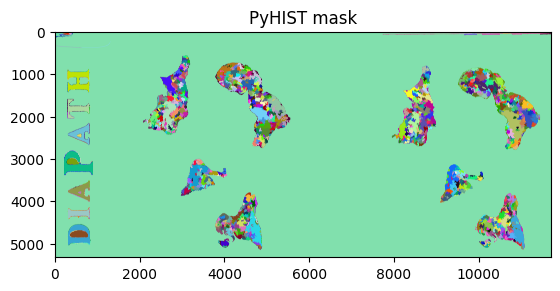

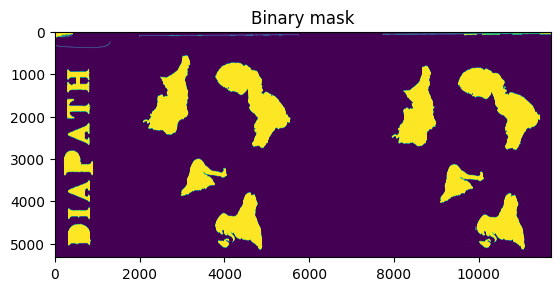

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030487200323374.svs
((51868, 35413), (12967, 8853), (3241, 2213))
0.50049999999999994
[20.0, 4.99992940345923, 1.2497671552037022]


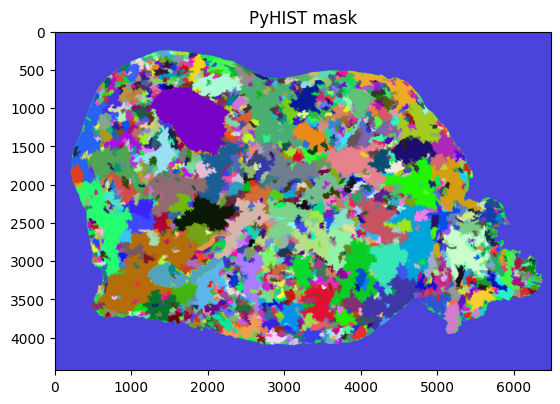

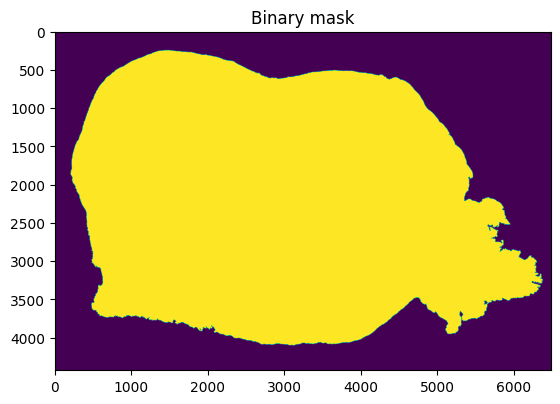

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030487200323369.svs
((61843, 39881), (15460, 9970), (3865, 2492))
0.50049999999999994
[20.0, 4.999816037980011, 1.2498286268724854]


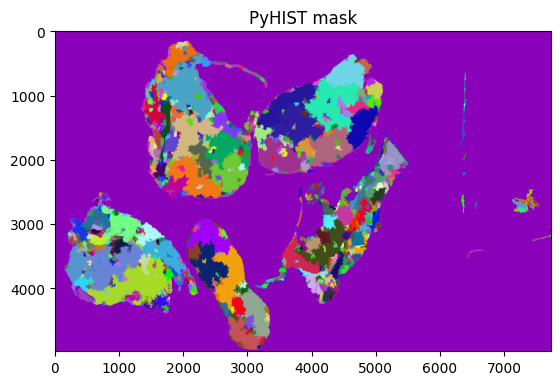

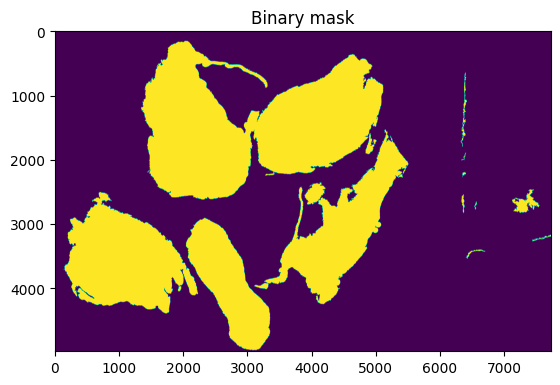

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000029496800270418.svs
((57768, 23462), (14442, 5865), (3610, 1466))
0.50229999999999997
[20.0, 4.99978688035463, 1.249753609672901]


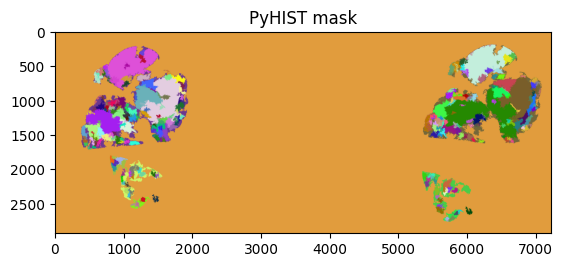

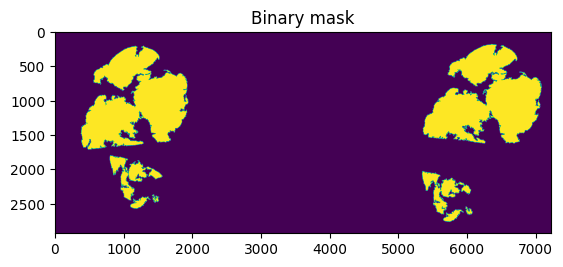

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000029488200270030.svs
((67728, 43466), (16932, 10866), (4233, 2716), (2116, 1358))
0.50229999999999997
[20.0, 4.999884964914299, 1.2498561929085845, 0.6248542800089677]


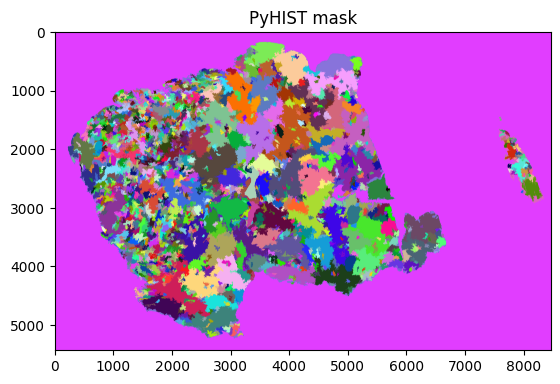

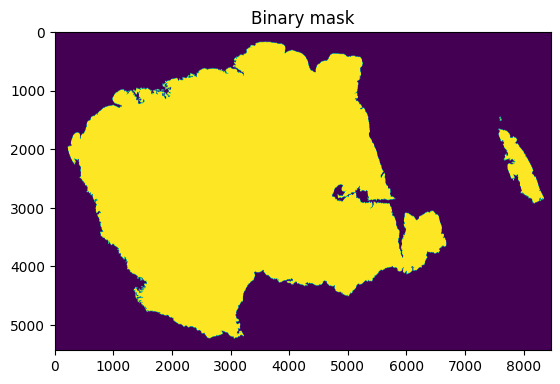

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030798000338238.svs
((129480, 91316), (32370, 22829), (8092, 5707), (4046, 2853))
0.25180000000000002
[40.0, 10.0, 2.4998680128759667, 1.2498244889781678]


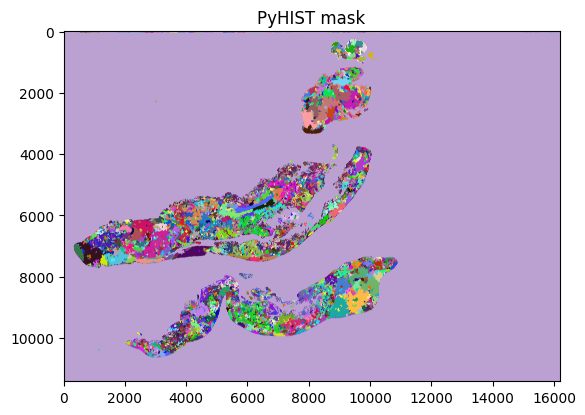

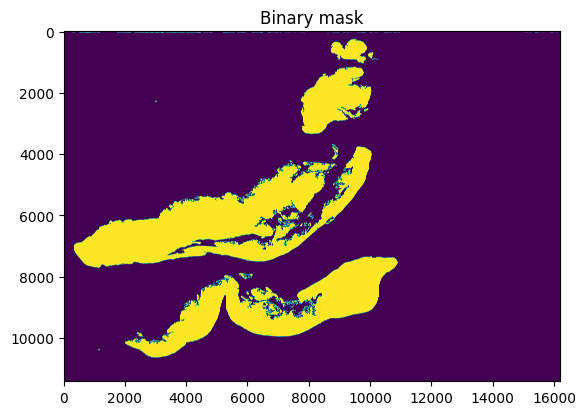

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030303300314210.svs
((43889, 32571), (10972, 8142), (2743, 2035))
0.50049999999999994
[20.0, 4.999712765923956, 1.2497746511895953]


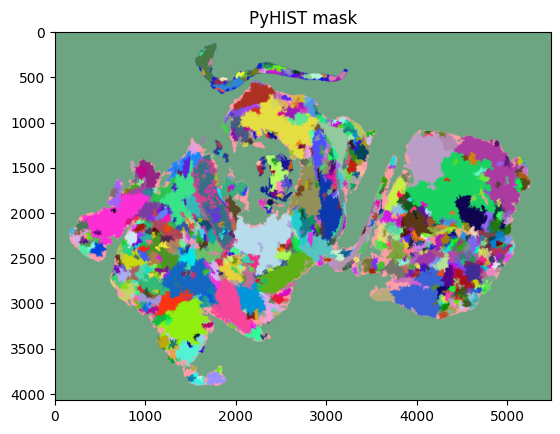

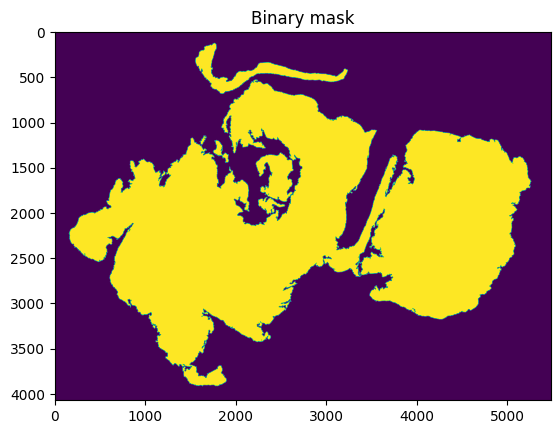

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030490100322319.svs
((93762, 40825), (23440, 10206), (5860, 2551), (2930, 1275))
0.50049999999999994
[20.0, 4.9998854364928045, 1.249848872759992, 0.6248019140020353]


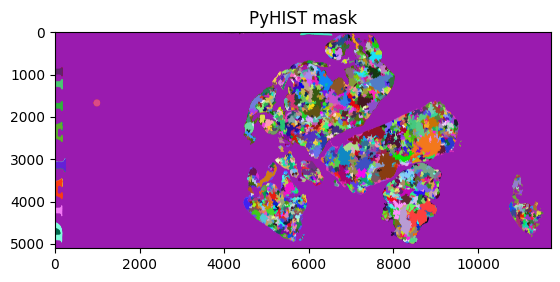

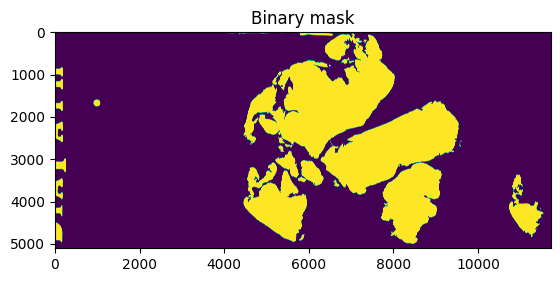

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030717900334729.svs
((127488, 62189), (31872, 15547), (7968, 3886), (3984, 1943))
0.25209999999999999
[40.0, 9.999919599282826, 2.4997386724560764, 1.2498693362280382]


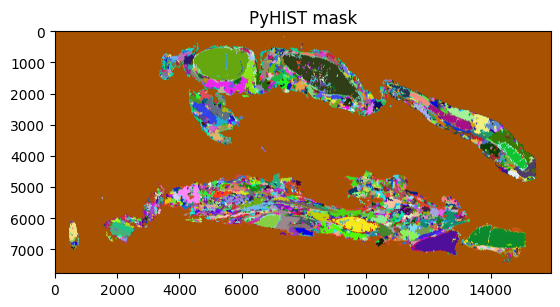

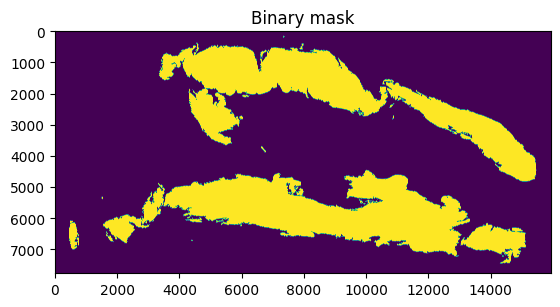

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030508000324798.svs
((81793, 46436), (20448, 11609), (5112, 2902), (2556, 1451))
0.50049999999999994
[20.0, 4.999969434850384, 1.2499385195121049, 0.6249692597560524]


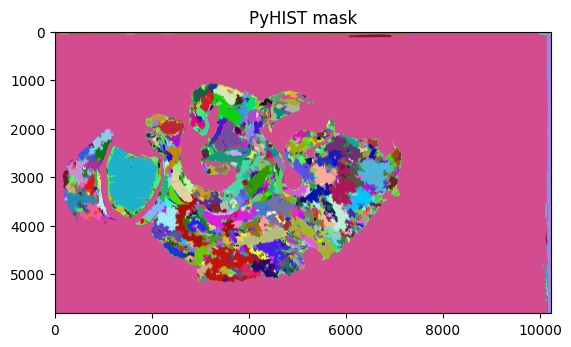

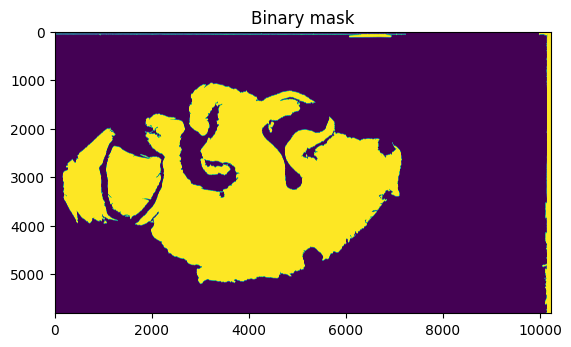

/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC/LungAOEC_List1/000030786300337665.svs
((123504, 42596), (30876, 10649), (7719, 2662), (3859, 1331))
0.25209999999999999
[40.0, 10.0, 2.4998826125745413, 1.249860339608568]


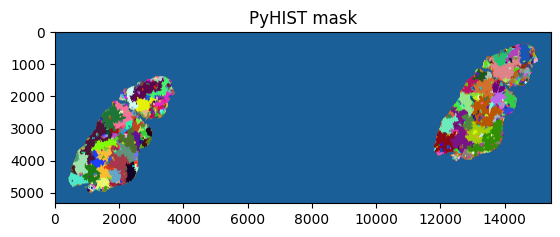

KeyboardInterrupt: 

In [3]:

datadir = Path("/mnt/nas4/datasets/ToReadme/ExaMode_Dataset1/AOEC")

for i in range(3):
	maskdir = Path(thispath.parent / "data" / "Mask_PyHIST_v2" / f"LungAOEC_List{i+1}")

	images = os.listdir(maskdir)

	for image in images:

		svs_file = [i for i in datadir.rglob("*.svs") if "LungAOEC" in str(i) and image in str(i)]

		histo_mask = cv.imread(str(Path(maskdir / image / f"segmented_{image}.ppm")))
		print(svs_file[0])
		slide = openslide.OpenSlide(str(svs_file[0]))
		print(slide.level_dimensions)
		mpp = slide.properties['openslide.mpp-x']
		print(mpp)

		level_downsamples = slide.level_downsamples
		mags = available_magnifications(mpp, level_downsamples)
		print(mags)

		# Mask from PyHIST to binary mask
		copy = histo_mask.copy()

		most_frequnt = check_corners(copy)
		copy[(copy != most_frequnt).any(axis=-1)] = 1
		copy[(copy == most_frequnt).all(axis=-1)] = 0
		binary_mask = copy[:, :, 0]
		
		plt.imshow(histo_mask)
		plt.title("PyHIST mask")
		plt.show()


		plt.imshow(binary_mask)
		plt.title("Binary mask")
		plt.show()